# Verifica Machine Learning (K-NN  e decision tree)
Autore: Pierro Nicolò <br>
Classe: 5EINF <br>
Data: 11/02/2022

In [ ]:
# import di pandas
import pandas as pd

# lettura csv
df = pd.read_csv('/content/accent-mfcc-data-1.csv')

In [ ]:
# visualizzazione
df

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


In [ ]:
# visualizziamo le persone per ogni lingua
print(df.groupby('language').size())

language
ES     29
FR     30
GE     30
IT     30
UK     45
US    165
dtype: int64


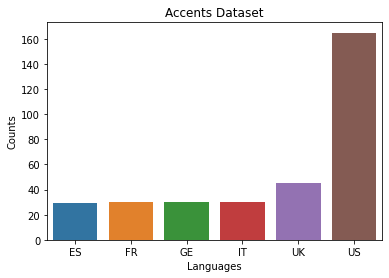

In [ ]:
# per maggior chiarezza, visualizziamo anche il grafico
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="language", data=df)
plt.title("Accents Dataset")
plt.xlabel("Languages")
plt.ylabel("Counts")
plt.show()

In [ ]:
# traformiamo il dataframe in una matrice numpy e separiamo il target (la classe, prima colonna, che chiamiamo y)
# dal resto dei dati (le osservazioni, che chiameremo x)
import numpy as np
dfnp = df.to_numpy()

x=dfnp[:,1:] # prendiamo tutti i dati tranne la prima colonna, osservazioni
y=dfnp[:,0] # prendiamo solo la prima colonna, target language

In [ ]:
# vediamo i dati presenti in x e y
print(x[:10])
print(f'y = {y[:10]}')

[[7.07147563279846 -6.51289966399678 7.65079980498752 11.1507832007291
  -7.65731234058068 12.4840205599929 -11.7097718857424 3.42659638843557
  1.46271520252172 -2.81275273412956 0.866537751632946 -5.24427382038509]
 [10.9829671733676 -5.15744504970454 3.95206022055212 11.5293811273129
  -7.63804669170403 12.1360978188533 -12.0362473181582 3.49194278632722
  0.595440752357685 -4.50881099351802 2.33214701045696 -6.22185741204842]
 [7.82710836372117 -5.4774719375507 7.81625728354177 9.18759183446928
  -7.17251058863673 11.7152993936345 -13.8472137647846 4.57407482690652
  -1.68755928601376 -7.20404059404916 -0.0118469028342711
  -6.46314403041117]
 [6.74408266350702 -5.68892029059513 6.54678865900131 9.00018318158033
  -6.92496340078943 11.710765707178 -12.3743884463117 6.16987885877346
  -0.544746654449008 -6.01923700122678 1.35855949477968 -6.35644130804511]
 [5.83684250980682 -5.32655674992234 7.4722647123844 8.84743979530141
  -6.77324443641384 12.6772177022118 -12.3150606993062 4.4

In [ ]:
# ora contiamo le classi che sono presenti nella y per vedere se corrispondono a quanto trovato nel dataframe
# Print class frequencies through collections counter
import collections
collections.Counter(y)

Counter({'ES': 29, 'FR': 30, 'GE': 30, 'IT': 30, 'UK': 45, 'US': 165})

In [ ]:
# suddividiamo ora i dati in due dataset, uno per 'allenare' il metodo (training set) 
# e l'altro per testarne l'efficacia (test set). Facciamo in modo che il training set sia il 70% del totale

from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
# visualizziamo gli shape dei vari dataset X_train, X_test, y_train e y_test
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((230, 12), (230,), (99, 12), (99,))

## K-NN

In [ ]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

### K = 3

In [ ]:
# inizializziamo il metodo con K = 3
neigh = KNeighborsClassifier(n_neighbors=3)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predict = neigh.predict(X_test)

# e visualizziamo il risultato (solo le prime dieci lingue)
print(f'dati predetti dal metodo =                {predict[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

dati predetti dal metodo =                ['US' 'FR' 'US' 'GE' 'FR' 'US' 'US' 'IT' 'ES' 'US']
dati reali presenti nel dataset di test = ['US' 'US' 'US' 'GE' 'FR' 'US' 'US' 'IT' 'ES' 'US']


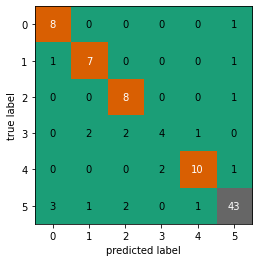

In [ ]:
# visualizziamo la confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

          ES       0.67      0.89      0.76         9
          FR       0.70      0.78      0.74         9
          GE       0.67      0.89      0.76         9
          IT       0.67      0.44      0.53         9
          UK       0.83      0.77      0.80        13
          US       0.91      0.86      0.89        50

    accuracy                           0.81        99
   macro avg       0.74      0.77      0.75        99
weighted avg       0.82      0.81      0.81        99



Usando K = 3 il metodo è preciso all'**81%**

### K = 5

In [ ]:
# inizializziamo il metodo con K = 5
neigh = KNeighborsClassifier(n_neighbors=5)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predict = neigh.predict(X_test)

# e visualizziamo il risultato (solo le prime dieci lingue)
print(f'dati predetti dal metodo =                {predict[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

dati predetti dal metodo =                ['US' 'FR' 'GE' 'GE' 'FR' 'US' 'US' 'IT' 'ES' 'US']
dati reali presenti nel dataset di test = ['US' 'US' 'US' 'GE' 'FR' 'US' 'US' 'IT' 'ES' 'US']


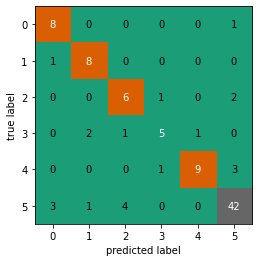

In [ ]:
# visualizziamo la confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

          ES       0.67      0.89      0.76         9
          FR       0.73      0.89      0.80         9
          GE       0.55      0.67      0.60         9
          IT       0.71      0.56      0.63         9
          UK       0.90      0.69      0.78        13
          US       0.88      0.84      0.86        50

    accuracy                           0.79        99
   macro avg       0.74      0.76      0.74        99
weighted avg       0.80      0.79      0.79        99



Usando K = 5 il metodo è preciso all'**79%**

### K = 7

In [ ]:
# inizializziamo il metodo con K = 7
neigh = KNeighborsClassifier(n_neighbors=7)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predict = neigh.predict(X_test)

# e visualizziamo il risultato (solo le prime dieci lingue)
print(f'dati predetti dal metodo =                {predict[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

dati predetti dal metodo =                ['US' 'FR' 'GE' 'GE' 'FR' 'US' 'US' 'IT' 'ES' 'US']
dati reali presenti nel dataset di test = ['US' 'US' 'US' 'GE' 'FR' 'US' 'US' 'IT' 'ES' 'US']


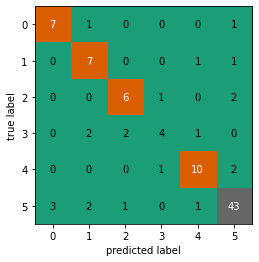

In [ ]:
# visualizziamo la confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

          ES       0.70      0.78      0.74         9
          FR       0.58      0.78      0.67         9
          GE       0.67      0.67      0.67         9
          IT       0.67      0.44      0.53         9
          UK       0.77      0.77      0.77        13
          US       0.88      0.86      0.87        50

    accuracy                           0.78        99
   macro avg       0.71      0.72      0.71        99
weighted avg       0.78      0.78      0.78        99



Usando K = 7 il metodo è preciso al **78%**

### Analisi dei risultati del metodo K-NN - considerazioni
Il metodo K-NN sembra diventare sempre meno accurato all'aumentare del valore di K. <br> Pertanto, valori più bassi sembrano garantire una maggiore accuratezza.

## Decision tree

In [ ]:
# importiamo il metodo di classificazione decision tree
from sklearn import tree

### Prova 1

In [ ]:
# inizializziamo il metodo con i seguenti parametri:
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=8, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=25, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=10
                                      )

In [ ]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=10, min_samples_split=25)

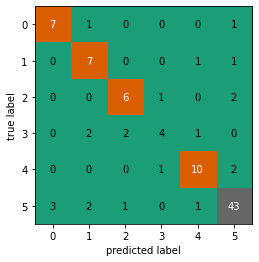

In [ ]:
# visualizziamo la confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

          ES       0.70      0.78      0.74         9
          FR       0.58      0.78      0.67         9
          GE       0.67      0.67      0.67         9
          IT       0.67      0.44      0.53         9
          UK       0.77      0.77      0.77        13
          US       0.88      0.86      0.87        50

    accuracy                           0.78        99
   macro avg       0.71      0.72      0.71        99
weighted avg       0.78      0.78      0.78        99



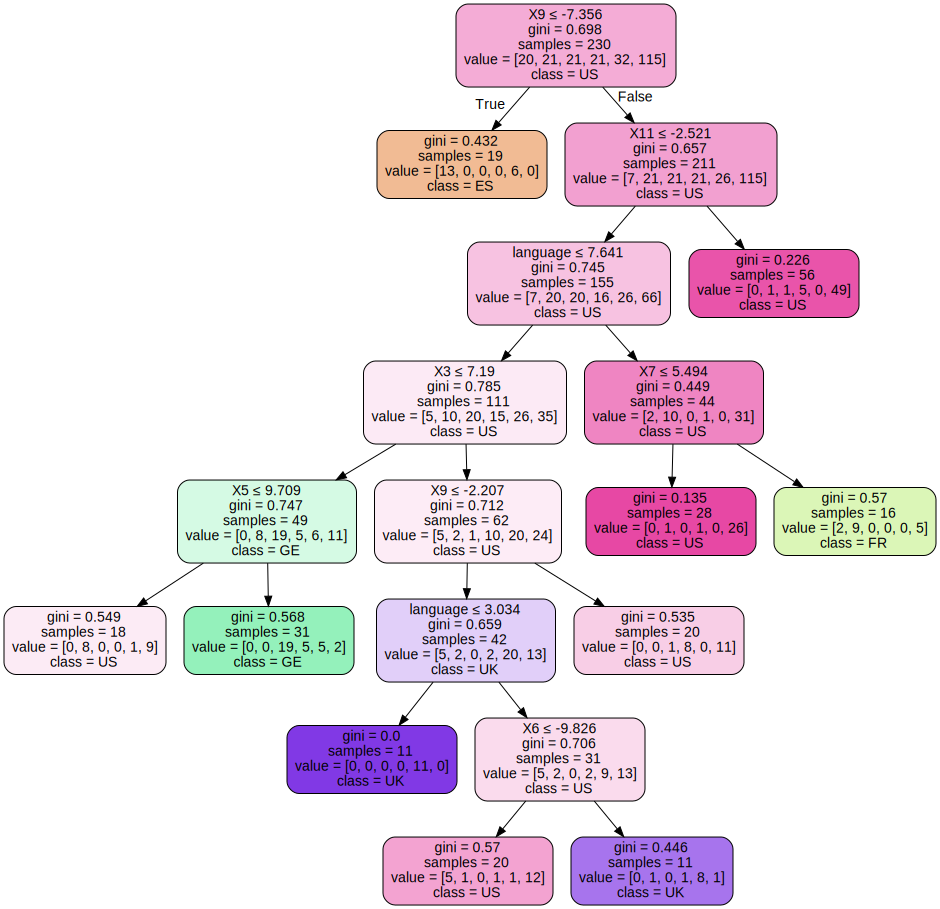

In [ ]:
# e poi in forma grafica
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:-1],  
                     class_names=['ES','FR', 'GE', 'IT', 'UK', 'US'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('accents')
graph

Il metodo, con questi parametri, è accurato al 78%

### Prova 2

In [ ]:
# inizializziamo il metodo con i seguenti parametri:
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

In [ ]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, min_samples_leaf=4,
                       min_samples_split=30)

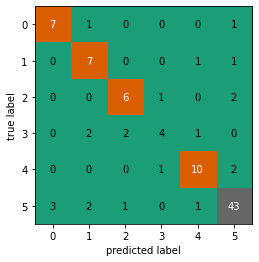

In [ ]:
# valutiamo il nostro metodo: più o meno accurato, qualche errore

# visualizziamo la confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

          ES       0.70      0.78      0.74         9
          FR       0.58      0.78      0.67         9
          GE       0.67      0.67      0.67         9
          IT       0.67      0.44      0.53         9
          UK       0.77      0.77      0.77        13
          US       0.88      0.86      0.87        50

    accuracy                           0.78        99
   macro avg       0.71      0.72      0.71        99
weighted avg       0.78      0.78      0.78        99



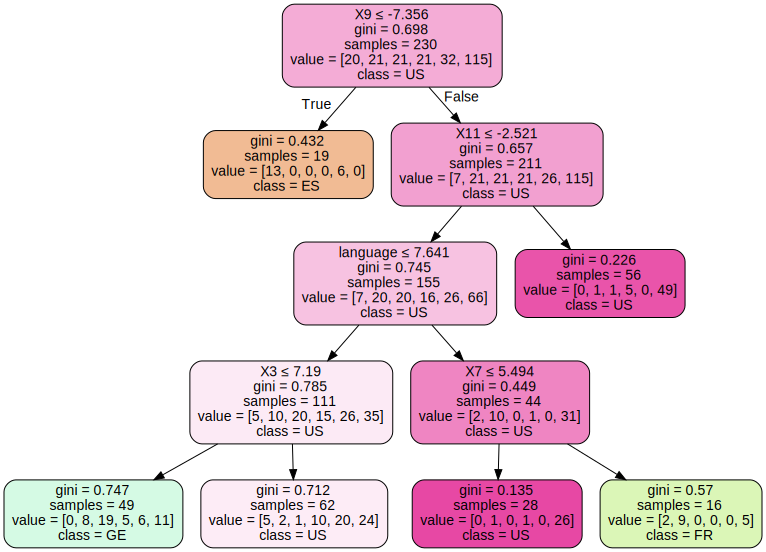

In [ ]:
# e poi in forma grafica
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:-1],  
                     class_names=['ES','FR', 'GE', 'IT', 'UK', 'US'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('accents')
graph

Il metodo, con questi parametri, è accurato al 78%

### Prova 3

In [ ]:
# inizializziamo il metodo con i seguenti parametri:
# criterio: indice di Gini
# profondità massima dell'albero: 8
# dimensione minima per lo split: 25
# numero di campioni delle foglie: 10
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=12, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=35, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=5
                                      )

In [ ]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=5, min_samples_split=35)

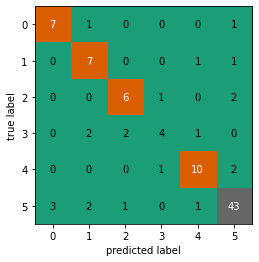

In [ ]:
# valutiamo il nostro metodo: più o meno accurato, qualche errore

# visualizziamo la confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

          ES       0.70      0.78      0.74         9
          FR       0.58      0.78      0.67         9
          GE       0.67      0.67      0.67         9
          IT       0.67      0.44      0.53         9
          UK       0.77      0.77      0.77        13
          US       0.88      0.86      0.87        50

    accuracy                           0.78        99
   macro avg       0.71      0.72      0.71        99
weighted avg       0.78      0.78      0.78        99



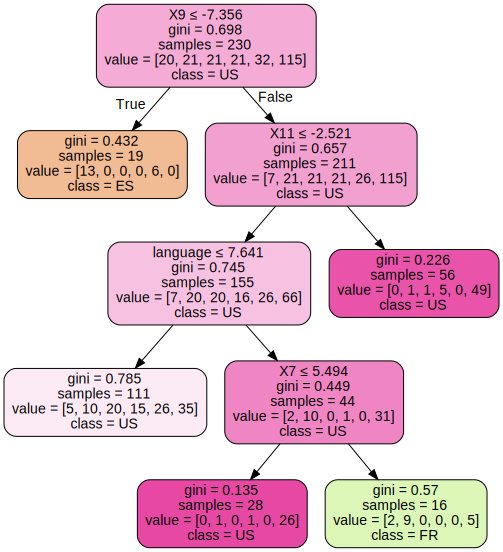

In [ ]:
# e poi in forma grafica
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:-1],  
                     class_names=['ES','FR', 'GE', 'IT', 'UK', 'US'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('accents')
graph

Il metodo, con questi parametri, è accurato al **78%**

### Analisi dei risultati del metodo decision tree - considerazioni

Il metodo decision tree ha dato gli stessi risultati in termini di accuratezza (78%), seppur avendo eseguito le diverse prove utilizzando parametri di `mad_depth`, `min_samples_split`, `max_leaf_nodes` e `min_samples_leaf` diversi. <br> La differenza tra gli alberi delle diverse prove è evidente confrontando la loro rappresentazione grafica.

## Confronto dei risultati dei due metodi - considerazioni finali
In termini di accuratezza, il metodo migliore risulta essere K-NN con K = 3 (accuretezza dell'81%). <br>
Tuttavia, usare un valore di K basso è rischioso perché, prendendo in considerazione un numero minore di elementi per fare una predizione, aumenta l'influenza di ogni elemento sulla predizione e più in generale essa viene eseguita utilizzando una varietà di dati inferiore. <br>
In questo caso è meglio farlo perché la predizione risulta più accurata, ma non è detto che ciò valga in ogni caso. Per gli accenti però, è così. <br>
Cambiare leggermente i parametri con il metodo del decision tree non sembra influenzare l'accuratezza della precisione nonostante gli alberi siano profondamente diversi tra loro in termini di forma e di estensione. E' possibile affermare che questo metodo risulta però più stabile del K-NN che invece vede alterati i suoi valori di accuratezza al variare dei parametri (K).
Pertanto, prima di usare quel metodo è necessario eseguire molte prove con valori di K diversi per capire quale meglio si adatti al dataset utilizzato mentre il decision tree è più affidabile e stabile in questo senso.